In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import re 
from operator import itemgetter
import warnings
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
import PyCCELL_PRFQT as px

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [101]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

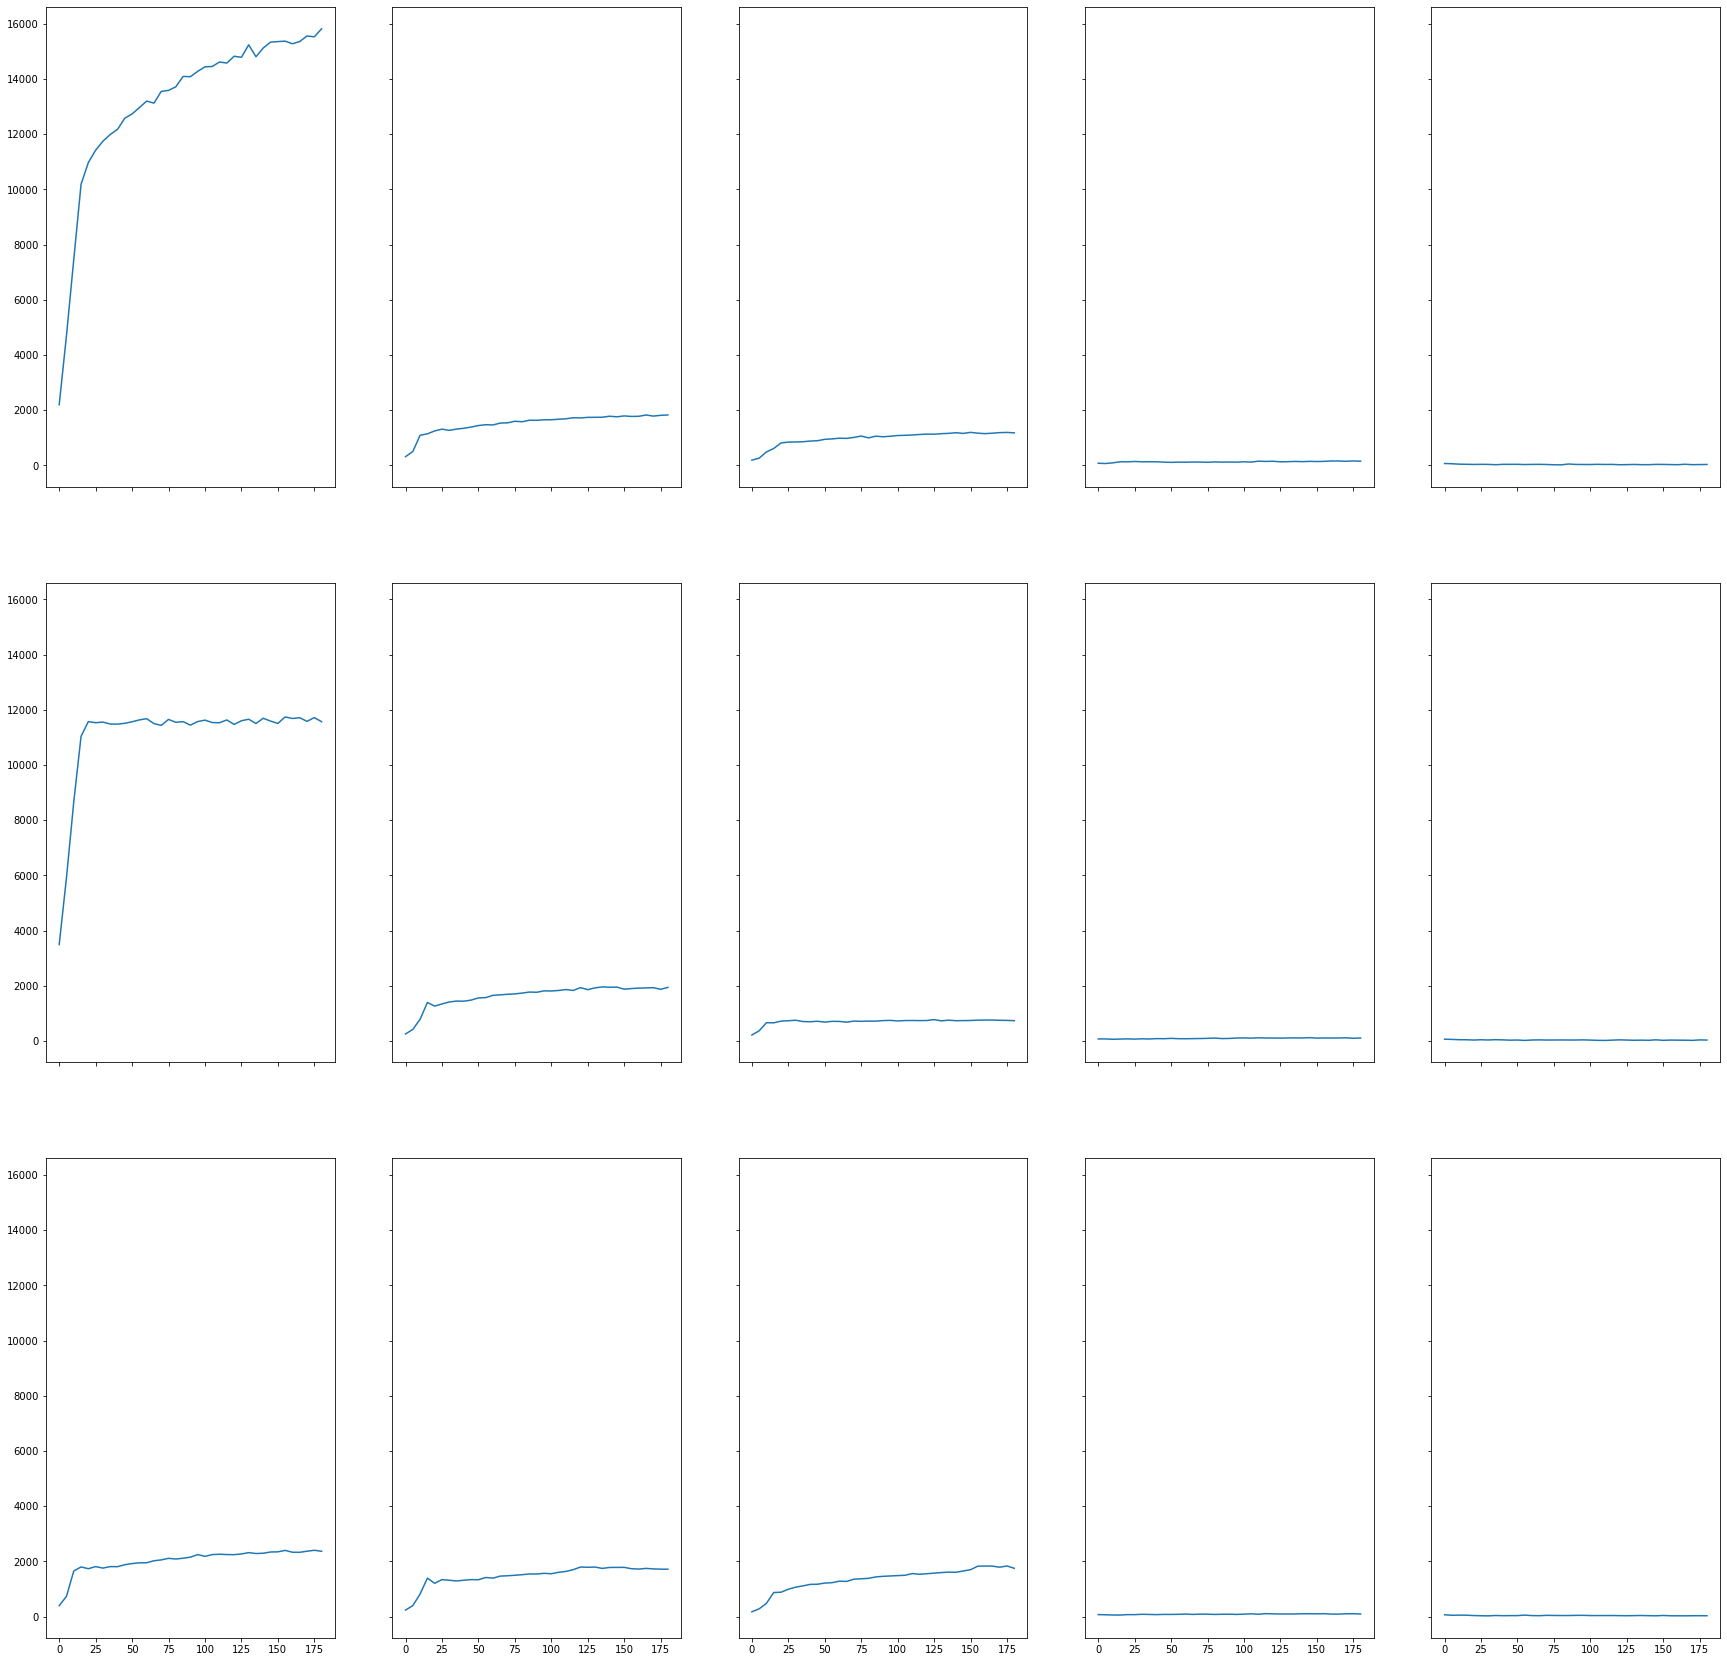

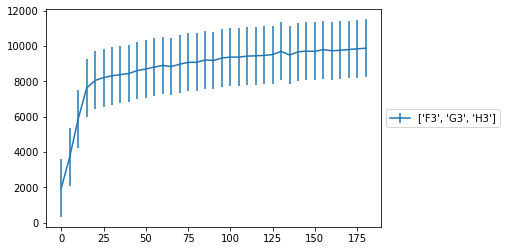

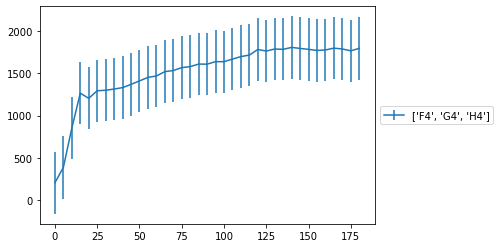

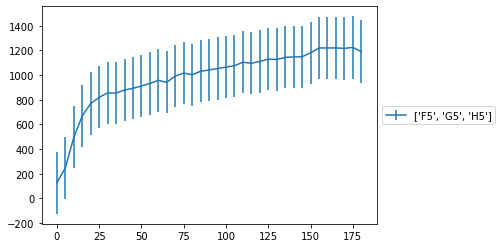

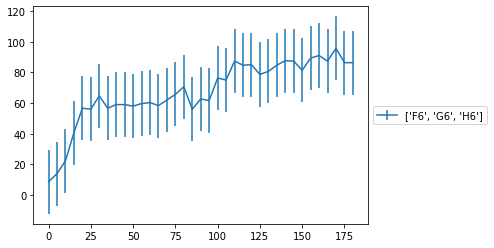

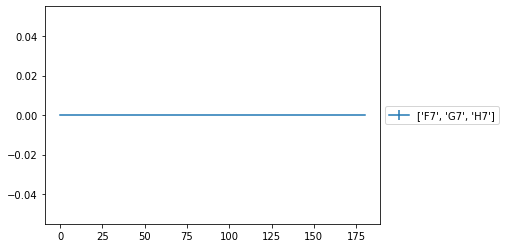

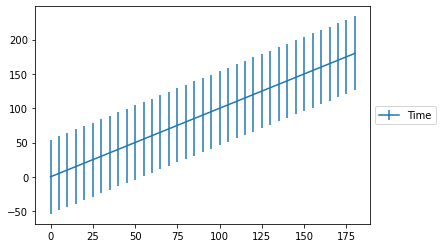

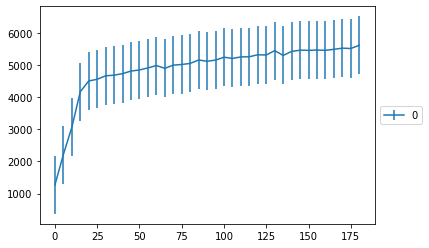

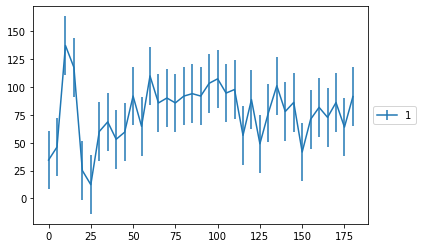

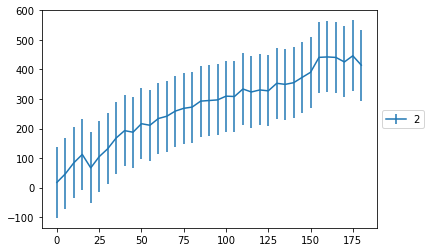

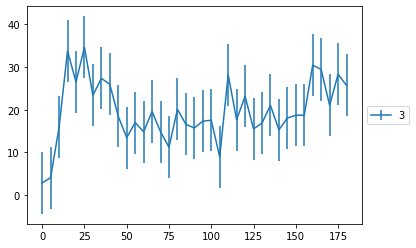

In [2]:
test = px.main('results/SHERLOCK/1st_try_probe_dilution/sherlock_probe_concentr_2.xlsx'
               ,70,"NO",3,5,'col',['F7','G7','H7'],"NO")


In [4]:
test.rename(columns={"['F3', 'G3', 'H3']": '2µM_P_Cold',
                   "['F4', 'G4', 'H4']": '2µM_P',
                     "['F5', 'G5', 'H5']":'1µM_P' ,
                     "['F6', 'G6', 'H6']": '0.1µM_P',
                    "['F7', 'G7', 'H7']": 'NC_wt_cas',
                     0: '2µM_P_Cold_std',
                   1: '2µM_P_std',
                     2:'1µM_P_std' ,
                     3: '0.1µM_P_std',
                    4: 'NC_wt_cas_std'},
          inplace=True, errors='raise')

test.head()

,2µM_P_Cold,2µM_P,1µM_P,0.1µM_P,NC_wt_cas,Time,2µM_P_Cold_std,2µM_P_std,1µM_P_std,0.1µM_P_std,NC_wt_cas_std
0,1963.000000,203.000000,127.333333,8.666667,0.0,0,1270.748423,34.451254,17.682383,2.867442,2.357023
1,3732.333333,385.333333,249.000000,14.000000,0.0,5,2215.646783,46.137476,46.778438,4.109609,5.557777
2,5879.000000,851.333333,496.000000,22.333333,0.0,10,3062.946874,137.254832,84.009259,15.923428,2.624669
3,7631.666667,1266.000000,670.000000,40.666667,0.0,15,4170.902300,117.621804,112.226953,33.793490,3.681787
4,8060.000000,1204.333333,769.666667,56.666667,0.0,20,4504.548886,25.037749,66.804857,26.512052,0.816497


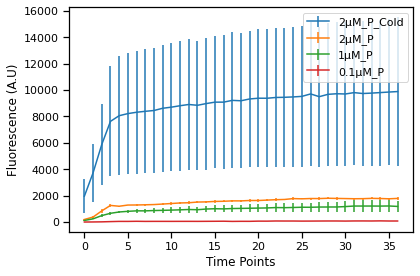

In [10]:
sns.set_context("notebook")
test[['2µM_P_Cold','2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test['2µM_P_Cold_std'],
                                                          test['2µM_P_std'],
                                                          test['1µM_P_std'],
                                                          test['0.1µM_P_std']])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

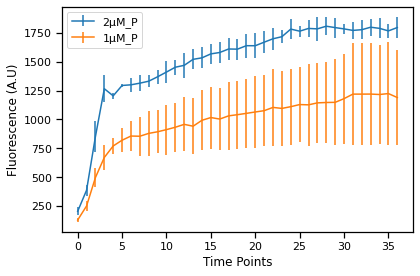

In [11]:
test[['2µM_P','1µM_P']].plot(yerr=[test['2µM_P_std'],test['1µM_P_std']])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

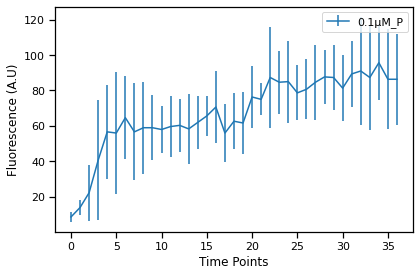

In [12]:
test[['0.1µM_P']].plot(yerr=test['0.1µM_P_std'])
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.legend()
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt3.png",dpi=300)
plt.show()

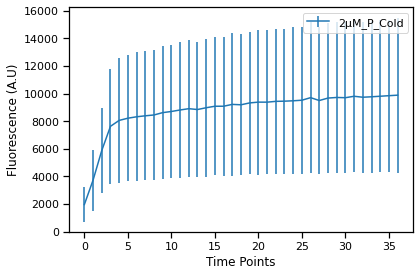

In [13]:
test[['2µM_P_Cold']].plot(yerr=test['2µM_P_Cold_std'])
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.legend()
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt4.png",dpi=300)
plt.show()

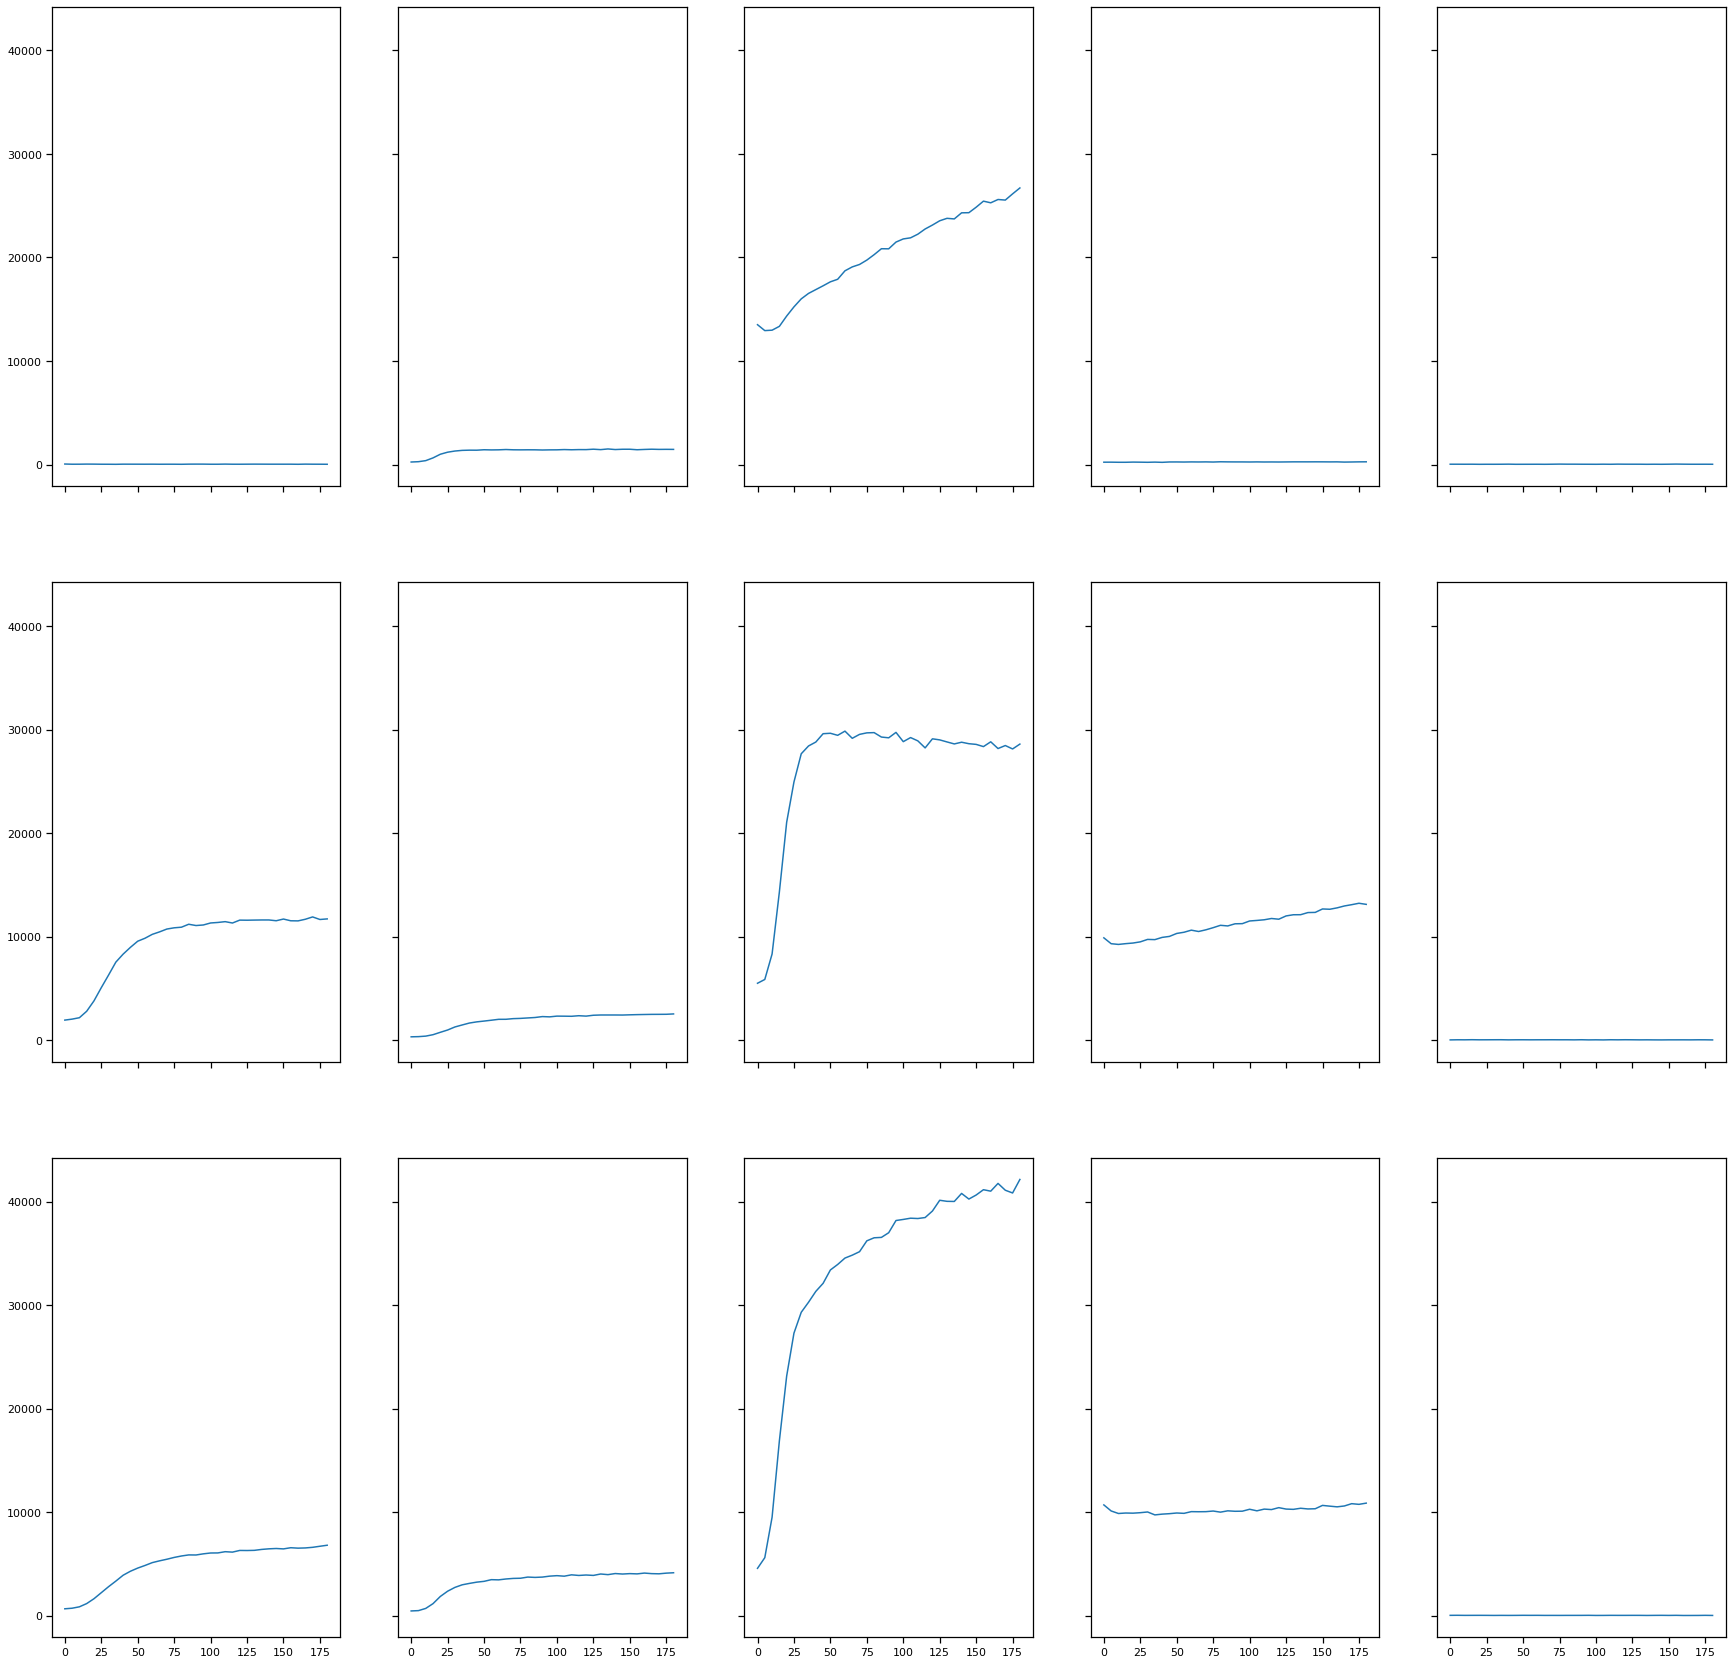

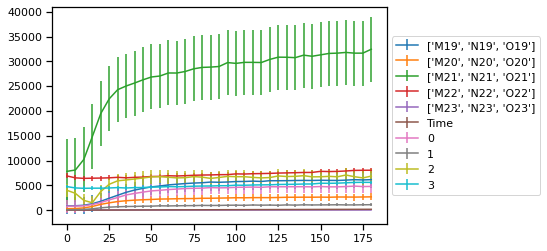

In [14]:
test_2 = px.main('results/SHERLOCK/1st_try_probe_dilution/first_sherlock_probe_concentr_modif.xlsx',50
            ,"NO",3,5,'col',['M23', 'N23', 'O23'],"YES")

In [15]:
test_2.columns

Index(['['M19', 'N19', 'O19']', '['M20', 'N20', 'O20']',
       '['M21', 'N21', 'O21']', '['M22', 'N22', 'O22']',
       '['M23', 'N23', 'O23']',                  'Time',
                             0,                       1,
                             2,                       3,
                             4],
      dtype='object')

In [16]:
test_2.rename(columns={"['M19', 'N19', 'O19']": '2µM_P', "['M20', 'N20', 'O20']":'1µM_P',
       "['M21', 'N21', 'O21']": '0.1µM_P', "['M22', 'N22', 'O22']":'experimental_error',
       "['M23', 'N23', 'O23']": 'NC_wt_cas',0: '2µM_P_std',
                   1: '1µM_P_std',
                     2:'0.1µM_P_std' ,
                     3: 'xperimental_error_std',
                    4: 'NC_wt_cas_std'},
          inplace=True, errors='raise')

test_2.head()

,2µM_P,1µM_P,0.1µM_P,experimental_error,NC_wt_cas,Time,2µM_P_std,1µM_P_std,0.1µM_P_std,xperimental_error_std,NC_wt_cas_std
0,853.666667,311.333333,7826.000000,6903.666667,0.0,0,783.449353,88.657894,4011.284832,4753.453785,5.715476
1,892.333333,332.666667,8096.000000,6516.000000,0.0,5,827.615182,90.469148,3396.861722,4481.892854,3.399346
2,987.666667,458.666667,10234.666667,6412.333333,0.0,10,876.958887,151.601085,1975.256327,4408.023316,0.816497
3,1298.666667,742.000000,14808.333333,6447.333333,0.0,15,1126.171193,278.090313,1493.640742,4435.356205,3.858612
4,1792.666667,1172.333333,19470.333333,6473.333333,0.0,20,1536.449804,473.635819,3750.248821,4436.402622,4.921608


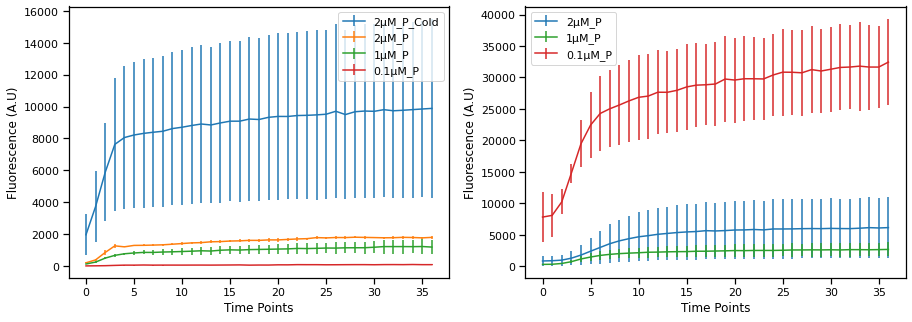

In [20]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['2µM_P_Cold','2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test['2µM_P_Cold_std'],
                                                          test['2µM_P_std'],
                                                          test['1µM_P_std'],
                                                          test['0.1µM_P_std']],ax=ax[0])
test_2[['2µM_P','1µM_P','0.1µM_P']].plot(yerr=[test_2['2µM_P_std'],test_2['1µM_P_std'],test_2['0.1µM_P_std']],ax=ax[1],color=['tab:blue','tab:green','tab:red'])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()


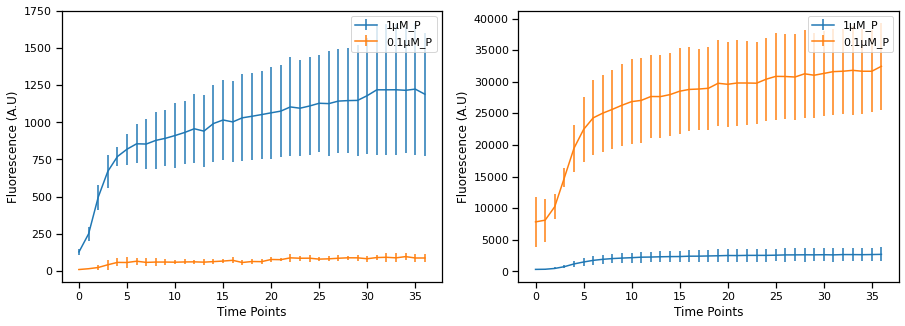

In [21]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['1µM_P','0.1µM_P']].plot(yerr=[test['1µM_P_std'],test['0.1µM_P_std']],ax=ax[0])
test_2[['1µM_P','0.1µM_P']].plot(yerr=[test_2['1µM_P_std'],test_2['0.1µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()


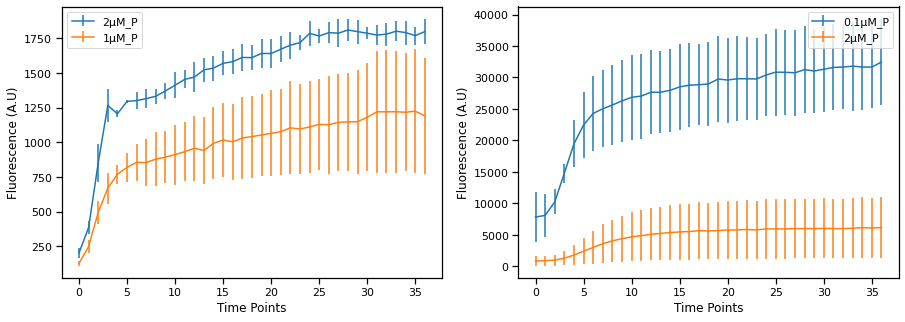

In [24]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['2µM_P','1µM_P']].plot(yerr=[test['2µM_P_std'],test['1µM_P_std']],ax=ax[0])
test_2[['0.1µM_P','2µM_P']].plot(yerr=[test_2['0.1µM_P_std'],test_2['2µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

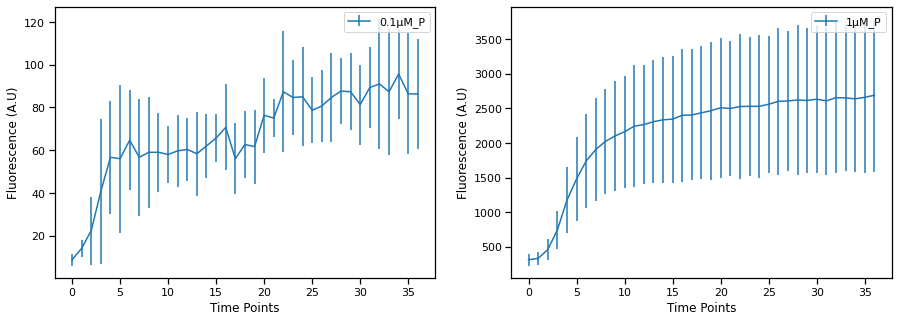

In [25]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

sns.set_context("notebook")
test[['0.1µM_P']].plot(yerr=[test['0.1µM_P_std']],ax=ax[0])
test_2[['1µM_P']].plot(yerr=[test_2['1µM_P_std']],ax=ax[1])

for ax in ax:
    
    ax.legend()
    ax.set_ylabel("Fluorescence (A.U)")
    ax.set_xlabel("Time Points")
    
#plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()

## Endpoint plots

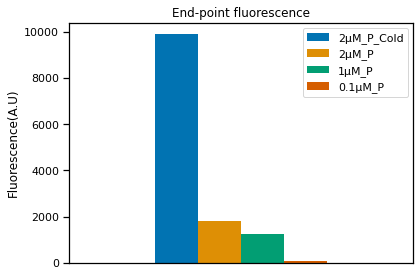

In [99]:
end_point = endpoint(test)
sns.set_context("notebook")
sns.set_palette("colorblind")

end_point.plot(kind="bar")
plt.legend()
plt.xticks([])
plt.ylabel("Fluorescence(A.U)")
plt.title("End-point fluorescence")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/end_point_probes.png",dpi=300)
plt.show()

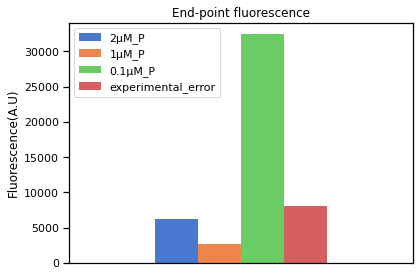

In [100]:
end_point = endpoint(test_2)

sns.set_context("notebook")
sns.set_palette("muted")

end_point.plot(kind="bar")
plt.legend()
plt.xticks([])
plt.ylabel("Fluorescence(A.U)")
plt.title("End-point fluorescence")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/end_point_probes_V1.png",dpi=300)
plt.show()
